In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns


In [2]:
import pandas as pd
import numpy as np

# Import and store the data in a data frame. 

In [3]:
data = 'http://www.stat.ufl.edu/~winner/data/airq402.dat'

In [4]:
col_names=['City1','City2','Average Fare ','Distance','Average weekly passengers','market leading airline','market share','Average fare 1','Low price airline','market share 1','price']

In [5]:
air_df = pd.read_csv(data,sep=r'\s{1,}',engine='python',names=col_names)

In [6]:
air_df.head(5)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare 1,Low price airline,market share 1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# Remove the outliers from the data 

In [7]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [8]:
col_names1=['Average Fare ','Distance','Average weekly passengers','market share','Average fare 1','market share 1','price']

In [9]:
for x in col_names1:
    air_df = remove_outlier(air_df, x)

In [10]:
air_df.count()

City1                        877
City2                        877
Average Fare                 877
Distance                     877
Average weekly passengers    877
market leading airline       877
market share                 877
Average fare 1               877
Low price airline            877
market share 1               877
price                        877
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


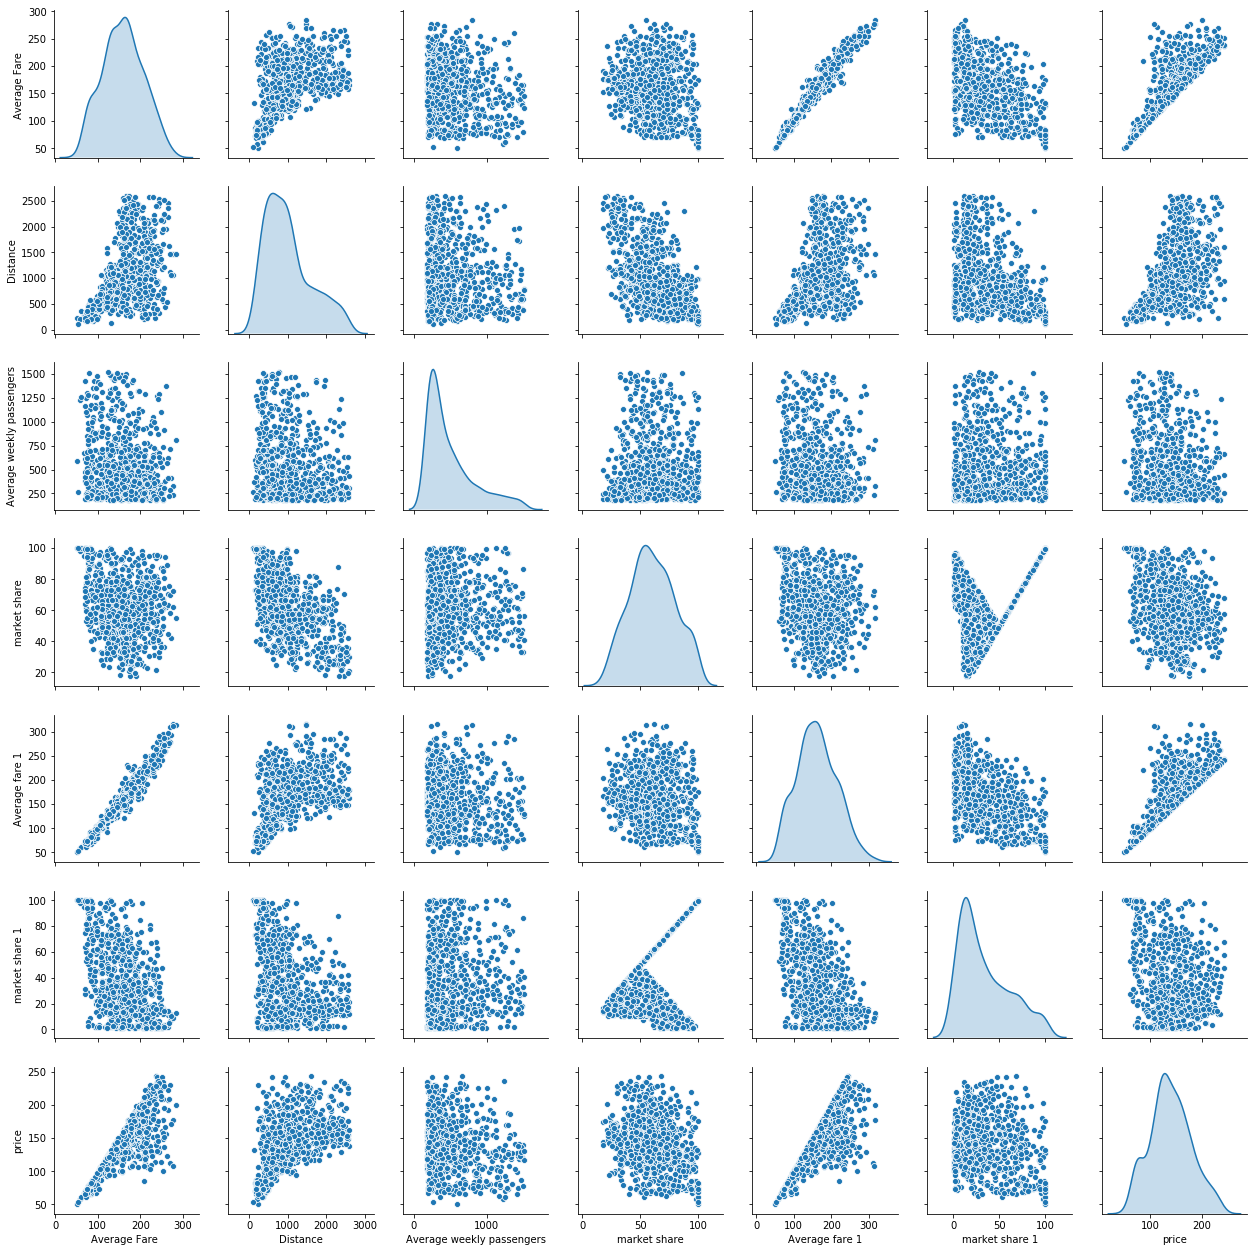

In [12]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

air_df_attr = air_df.iloc[:, 0:11]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(air_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

# Drop the independent variables which has less than 0.1 correlation with the dependent variable 

In [13]:
col_names1=['Distance','Average weekly passengers','market share','Average fare 1','market share 1','price']

In [14]:
for x in col_names1:
    print ('Independent variables {1} corr value is {0}'.format(air_df['Average Fare '].corr(air_df[x]),x))
    if air_df['Average Fare '].corr(air_df[x]) < 0.1:
        air_df = air_df.drop([x],axis=1)
        print('Drop column Name {0}'.format(x))

Independent variables Distance corr value is 0.5122795354050049
Independent variables Average weekly passengers corr value is -0.1947692509966226
Drop column Name Average weekly passengers
Independent variables market share corr value is -0.2022047452053755
Drop column Name market share
Independent variables Average fare 1 corr value is 0.9798532023441796
Independent variables market share 1 corr value is -0.4980249478337339
Drop column Name market share 1
Independent variables price corr value is 0.8373288791242134


In [15]:
air_df.head(5)

,City1,City2,Average Fare,Distance,market leading airline,Average fare 1,Low price airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42


# Create scatter Plot of Independent Variable vs Dependent Variable.

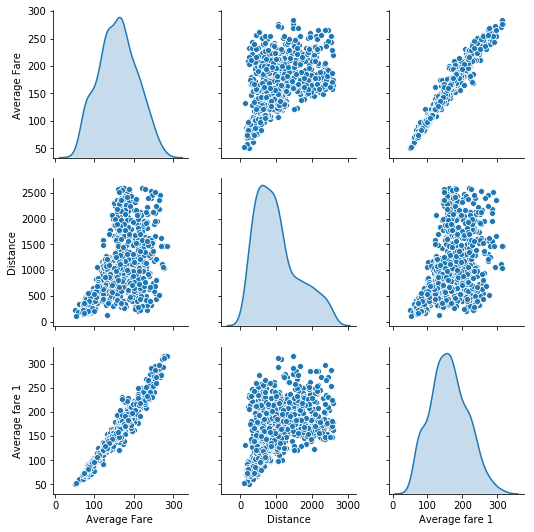

In [16]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

air_df_attr = air_df.iloc[:, 0:7]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(air_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [17]:
for feature in air_df.columns: # Loop through all columns in the dataframe
    if air_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        air_df[feature] = pd.Categorical(air_df[feature]).codes # Replace strings with an integer

# Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

In [19]:
X = air_df.drop(["Average Fare ",'City1','City2'], axis=1)

In [20]:
y = air_df[["Average Fare "]]

# Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

# Print the coefficients & intercepts of the linear regression model (5 points)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Distance is 0.0019185755158368375
The coefficient for market leading airline is -0.1634732599128039
The coefficient for Average fare 1 is 0.7631431460840925
The coefficient for Low price airline is 0.05973210684478995
The coefficient for price is 0.18837260963112235


In [28]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 8.574770809771877


In [29]:
y_train_pred = regression_model.predict(X_train)

In [30]:
y_train_pred

array([[191.52433353],
       [231.00329261],
       [186.2641444 ],
       [122.3652261 ],
       [ 85.61423907],
       [130.94984239],
       [237.91410502],
       [199.6258755 ],
       [ 79.1871021 ],
       [ 78.14896399],
       [156.99761278],
       [129.94897497],
       [ 91.17076917],
       [164.93307855],
       [135.4305885 ],
       [155.96201214],
       [155.78686332],
       [190.41895384],
       [216.90439766],
       [174.2533852 ],
       [207.40224066],
       [158.95584109],
       [178.94749251],
       [197.26108548],
       [212.98795183],
       [152.73943379],
       [241.04320135],
       [134.47384477],
       [166.38081189],
       [135.38352511],
       [167.83443236],
       [177.59631833],
       [134.77225935],
       [249.03814354],
       [113.25869619],
       [175.35029037],
       [192.10328677],
       [150.92706617],
       [166.82751641],
       [ 72.50909362],
       [127.23189586],
       [198.39760926],
       [155.32770892],
       [197

In [31]:
import matplotlib.pyplot as plt

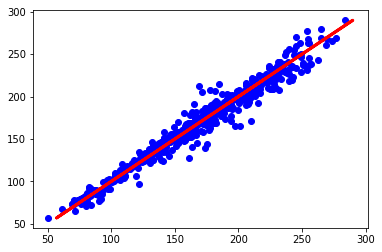

In [32]:
plt.scatter(y_train,y_train_pred ,color='blue')
plt.plot(y_train_pred, y_train_pred, color='red', linewidth=3)
plt.show()

# Print the accuracy of the overall model 

In [33]:
regression_model.score(X_train, y_train)

0.9680668197203042

In [34]:
regression_model.score(X_test, y_test)

0.9800853332195654